<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# ***Mean Shift Clustering***

$ \ $ 

As you hike (caminar) in the mountains, you stumble (tropiezas) upon a plant you have never seen before. You look around and you spot a few more of them. The similarities between them tell you that they probably belong to the same group of plants. However, you are not a botanist, so you can't know exactly which species these plants belong to. This task can be solved with the help of clustering analysis. Clustering can identify the groups of similar looking objects and group them together based on their similar instances.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/images/hiking.jpg" width="70%">



$ \ $

-----

## ***Notebook development***

$ \ $ 

In this notebook, we will explore $\color{lightblue}{\text{Mean Shift Clustering}}$ (agrupamiento de cambio promedio), which is

$ \ $ 

$$\color{yellow}{\text{a non-parametric centroid-based clustering algorithm.}}$$


$ \ $ 

$\color{lightblue}{\text{Mean Shift Clustering}}$ attempts to group data without having first to be trained on the labeled data. Unlike the $K$-Means Clustering, when using the $\color{lightblue}{\text{Mean Shift}}$ (cambio promedio), we don't need to specify the number of clusters beforehand. $\color{lightblue}{\text{Mean Shift Clustering}}$ is used in a wide variety of applications, such as

* image segmentation,

* academic ranking systems,

* search engines,

* medicine,

* and many others.

In the first part of this notebook, we will focus on the image segmentation, which is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object. In the second part of this notebook, we will show how to use the $\color{lightblue}{\text{Mean Shift Clustering}}$ to classify the survivors rates of the Titanic, the most famous shipwreck in history. Based on the passengers' features

* age, 

* ticket class,

* fare, etc.

we will classify the passengers into clusters with different survival probabilities.



$ \ $

----

## ***Objectives***

$ \ $

After completing this lab you will be able to:

* Understand $\color{lightgreen}{\text{Kernel Density Estimation}}$ ($KDE$).


* Describe how $\color{lightblue}{\text{Mean Shift}}$ Works from scratch.


* Implement $\color{lightblue}{\text{Mean Shift}}$ for image segmentation.


$ \ $ 

-----

## ***Setup***

$ \ $

For this lab, we will be using the following libraries:


* [pandas](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for managing the data.


* [numpy](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for mathematical operations.

* [sklearn](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for machine learning and machine-learning-pipeline related functions.

* [openCV](https://opencv.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) OpenCV provides a real-time optimized Computer Vision library, tools, and hardware. 

* [matplotlib](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for additional plotting tools.


$ \ $

----

## ***Importing Required Libraries***

$ \ $

he following required modules are pre-installed in the Skills Network Labs environment. 

In [1]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import cv2 as cv
from sklearn.cluster import MeanShift, estimate_bandwidth
from mpl_toolkits import mplot3d
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import requests
from PIL import Image
from io import BytesIO

In [3]:
# Surpress numpy data type warnings
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) 
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning) 
warnings.filterwarnings("ignore", category = FutureWarning)

$ \ $

-----

## ***Mean Shift for Image Segmentation***

$ \ $

$\color{lightblue}{\text{Mean Shift Clustering}}$ can be used for image segmentation. An image segmentation attempts to cluster an image pixels according to their color. It then replaces each pixel's color with the mean color of its cluster. This way considerably reduces the number of different colors in the image. So, each cluster represents the mode or the most common intensities. Every pixel is labeled according to the cluster it’s nearest to. Consider the following image.

$ \ $

$(1)$ We start with loading the following image.

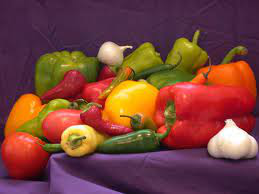

In [4]:
# describimos la url de la imagen
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/peppers.jpeg"

# esta funcion obtiene el contenido de la url
response = requests.get(url)

# Image.open abre e identifica el archivo de imagen dado
# BytesIO es una clase en el módulo 'Io' de Python que proporciona una interfaz similar a un archivo para flujos de bytes en memoria
img = Image.open(BytesIO(response.content))

# mostramos la imagen en pantalla
img

$ \ $

$(2)$ We take the previous image and transform it in the "same" image with diferent colors.

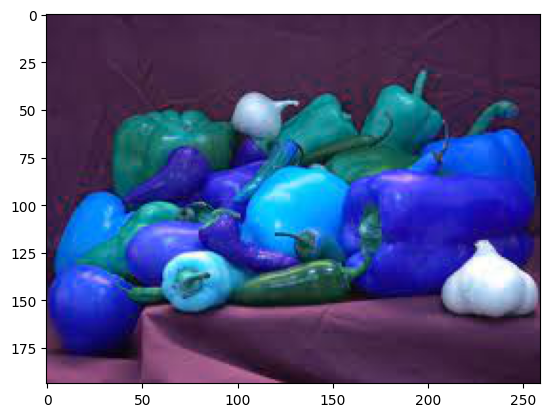

In [5]:
# convertimos nuestra imagen en un array
img = np.array(img) 

# cvtColor () se utiliza para convertir una imagen de un espacio de color a otro.
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB));

$ \ $

$(3)$ We will pre-process the image by smoothing it.

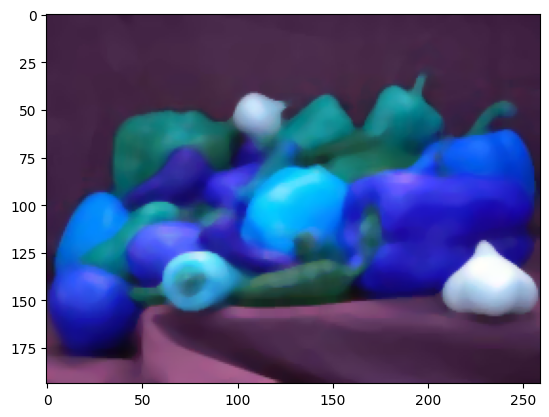

In [6]:
# convertimos nuestra imagen en un array
img = np.array(img) 

# como se desprende claramente del nombre, esto toma una mediana de todos los píxeles debajo del área del núcleo y reemplaza el elemento central con este valor mediano.
img = cv.medianBlur(img, 7)

# cvtColor () se utiliza para convertir una imagen de un espacio de color a otro.
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB));

$ \ $

$(4)$ We can plot the $\color{red}{\text{Red}}$, $\color{green}{\text{Green}}$, $\color{blue}{\text{Blue}}$ ($RGB$) values as $3D$ points.

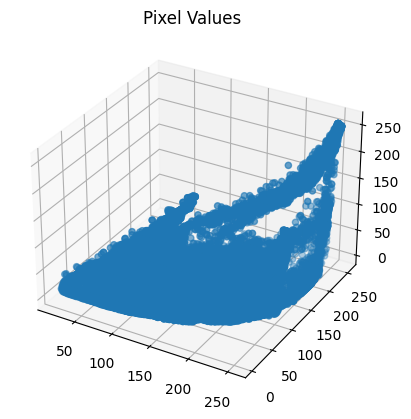

In [7]:
# describimos los ejez del espacio R^3
# describimos los ejez del espacio R^3
ax = plt.axes(projection = "3d")

# describimos los datos del eje x
x = img[:, :, 0]

# describimos los datos del eje y
y = img[:, :, 1]

# describimos los datos del eje z
z = img[:, :, 2]

# realizamos un scatterplot (x,y,z)
ax.scatter3D(x, y, z)

# establecemos el titulo del plot
ax.set_title('Pixel Values ')

# mostramos la imagen en pantalla
plt.show()

$ \ $

$(5)$ We have a rectangular image with three channels.

In [8]:
img.shape

(194, 259, 3)

$ \ $

$(6)$ We convert the image to $194 \times 259$ rows ($194 \times 259 = 50246$, which is the shape of our matrix) for each pixel, and three columns for each color channel ($\color{red}{\text{Red}}$, $\color{green}{\text{Green}}$, $\color{blue}{\text{Blue}}$), as a numpy array of $X$.


In [9]:
# tomamos la imagen img y remodelamos su tamaño para que tenga la forma m x 3 ------> llamamos estos datos X
X = img.reshape((-1, 3))

# describimos el tamaño de X
print("shape: ", X.shape)

# describimos el tipo de datos de X
print("data type   : ", X.dtype)

shape:  (50246, 3)
data type   :  uint8


$ \ $

$(7)$ As we see, the data type is `unit8`, so, we need to cast it to be a `float32`.


In [10]:
X = np.float32(X)

$ \ $

-----

## ***Apply Mean Shift to the Image***

$ \ $

$(1)$ Estimate the bandwidth (banda ancha) to use with the $\color{lightblue}{\text{Mean Shift algorithm}}$ (algoritmo de cambio promedio), using the <code>estimate_bandwidth</code> function that has the following parameters:


* $\color{lightblue}{\text{X}}$: array-like of shape <code>(n_samples, n_features)</code>
Input points.


* $\color{lightblue}{\text{quantile}}$: float, default $ =0.3$ Should be between $[0, 1]$. For example, $0.5$ means that the median of all pairwise distances is used.


* $\color{lightblue}{\text{n_samples}}$: int, The number of samples to be used. If not given, then all samples are to be used.


In [11]:
bandwidth = estimate_bandwidth(X, quantile = 0.06, n_samples = 3000)
bandwidth 

33.52662811577077

$ \ $

$(2)$ We create a $\color{lightblue}{\text{MeanShift}}$ object in sklearn with the following parameters:

* $\color{lightblue}{\text{bandwidth}}$: float, default = None
Bandwidth used in the $RBF$ kernel.

* $\color{lightblue}{\text{max_itert}}$: (default $=300$) Maximum number of iterations per seed point before the clustering operation terminates (for that seed point), if has not converged yet.

* $\color{lightblue}{\text{bin_seeding}}$: if true, initial kernel locations are not locations of all points, but rather the location of the discretized version of points.


In [12]:
ms = MeanShift(bandwidth = bandwidth, bin_seeding = True)

$ \ $

$(3)$ We then fit the model.

In [13]:
ms.fit(X)

MeanShift(bandwidth=33.52662811577077, bin_seeding=True)

$ \ $

$(4)$ Now, we have the label corresponding to the label of each row.

In [14]:
labeled = ms.labels_
labeled

array([0, 0, 0, ..., 0, 0, 0])

$ \ $

$(5)$ For each sample, we can find the assigned clusters.

In [15]:
clusters = ms.predict(X)
clusters

array([0, 0, 0, ..., 0, 0, 0])

$ \ $

$(6)$ We can list the unique clusters.

In [16]:
np.unique(labeled)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

$ \ $

$(7)$ We can also list the actual cluster centroid locations, which are also the $RGB$ values.

In [17]:
ms.cluster_centers_

array([[ 70.047585,  37.910378,  67.290054],
       [173.61473 ,  28.873552,  32.465878],
       [ 97.505   ,  94.19406 ,  25.353125],
       [141.22623 , 130.9818  ,  24.220963],
       [123.05814 ,  78.833244, 138.77016 ],
       [237.65907 , 108.30878 ,  11.087073],
       [251.84216 , 182.78345 ,   8.354187],
       [239.97244 , 214.58464 , 188.98425 ],
       [216.2505  , 184.08748 , 156.90855 ],
       [251.05128 , 246.82051 , 239.8282  ],
       [250.06876 , 217.33438 ,  91.85625 ]], dtype=float32)

$ \ $

$(8)$ We can convert the cluster centers to `unit8` datatype for images.


In [18]:
cluster_int8 = np.uint8(ms.cluster_centers_)
cluster_int8

array([[ 70,  37,  67],
       [173,  28,  32],
       [ 97,  94,  25],
       [141, 130,  24],
       [123,  78, 138],
       [237, 108,  11],
       [251, 182,   8],
       [239, 214, 188],
       [216, 184, 156],
       [251, 246, 239],
       [250, 217,  91]], dtype=uint8)

$ \ $

$(9)$ We can also estimate what cluster each sample belongs to, as follows.

In [19]:
ms.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

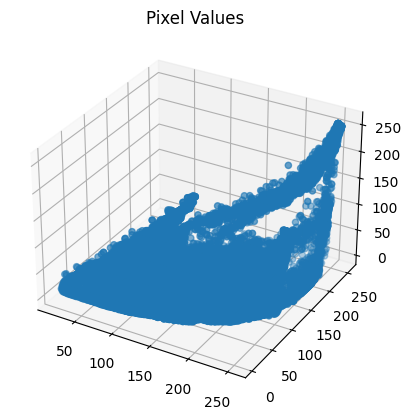

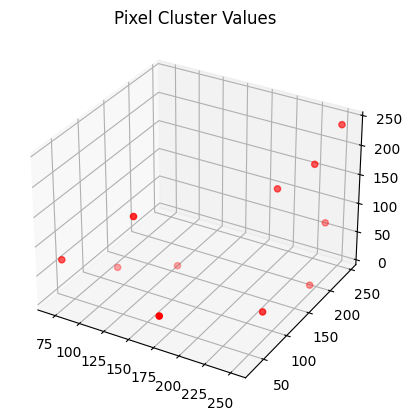

In [20]:
# describimos los ejez del espacio R^3
ax = plt.axes(projection = "3d")

# describimos los datos del eje x
x = img[:, :, 0]

# describimos los datos del eje y
y = img[:, :, 1]

# describimos los datos del eje z
z = img[:, :, 2]

# realizamos un scatterplot (x,y,z)
ax.scatter3D(x, y, z)

# establecemos el titulo del plot
ax.set_title('Pixel Values')

# mostramos la imagen en pantalla
plt.show()


####################################################################################################################################################################3


# describimos los ejez del espacio R^3
ax = plt.axes(projection = "3d")

# describimos los datos del eje x
x = cluster_int8[:, 0]

# describimos los datos del eje y
y = cluster_int8[:, 1]

# describimos los datos del eje z
z = cluster_int8[:, 2]

# realizamos un scatterplot (x,y,z) con color rojo
ax.scatter3D(x, y , z, color = 'red')

# establecemos el titulo del plot
ax.set_title('Pixel Cluster Values')

# mostramos la imagen en pantalla
plt.show()


$ \ $

$(10)$ We can assign each data point to the cluster value and reshape it back to a Rectangular image.

In [21]:
# creamos un array (matriz) nulo de tamaño mxn = X.shape
result = np.zeros(X.shape, dtype = np.uint8)

# describimos las unicas etiquetas
# labeled = ms.labels_ ------> ms tiene el mismo tamaño que X -----> labaled tambien tiene el mismo tamaño que X
labels = np.unique(labeled)

# realizamos una iteracion sobre las etiquetas
for l in labels: 

    # tomamos los renglones de result de las etiquetas que son iguales a l y reasignamos los valores a cluster_int8[l, :] 
    result[labeled == l, :] = cluster_int8[l, :]    
    
# remodelamos el tamaño del array para que tenga el mismo tamaño que img
result = result.reshape(img.shape)

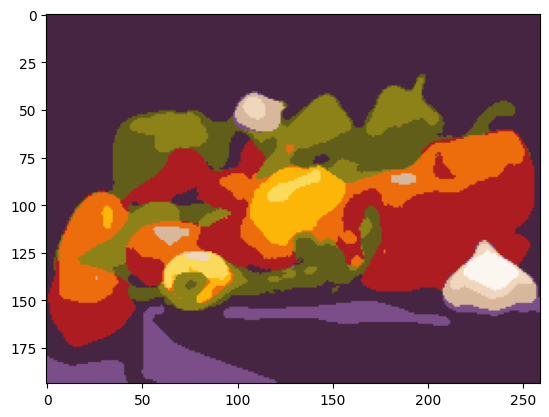

In [22]:
plt.imshow(result);

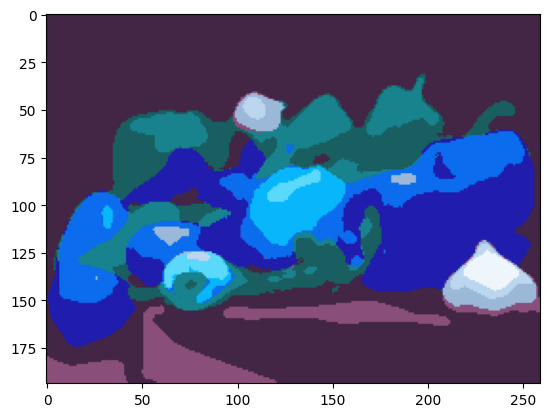

In [23]:
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB));

$ \ $

$(11)$ We now plot each cluster, as a cluster value, and we see that each cluster corresponds to a different object.

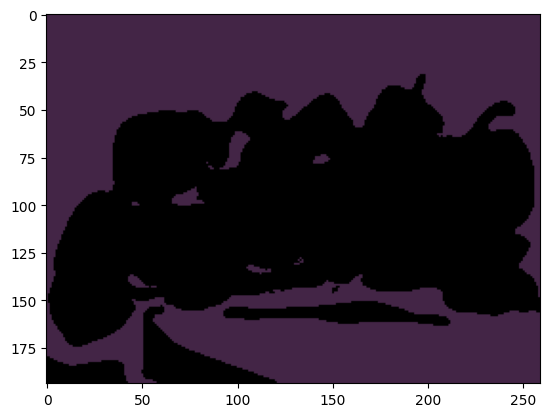

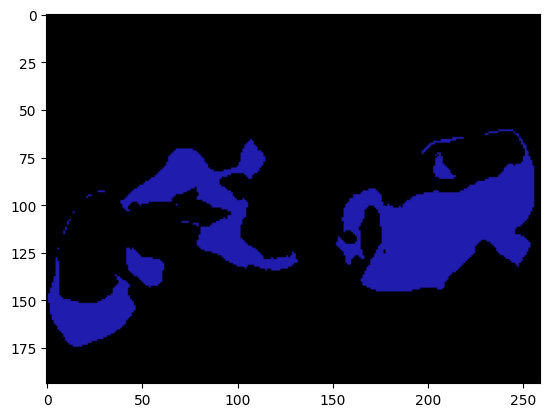

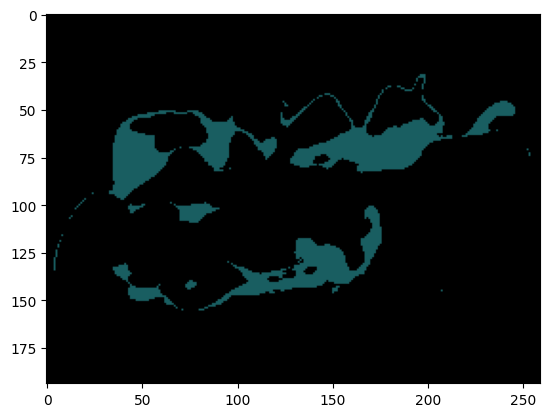

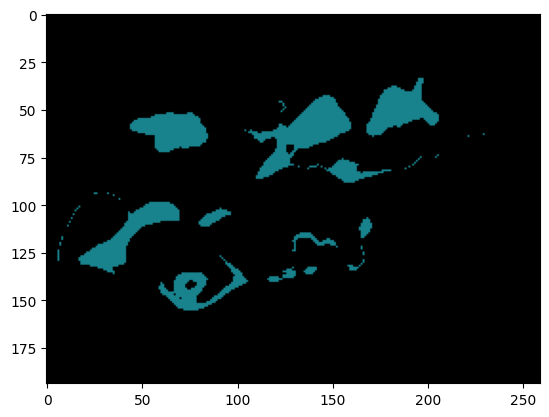

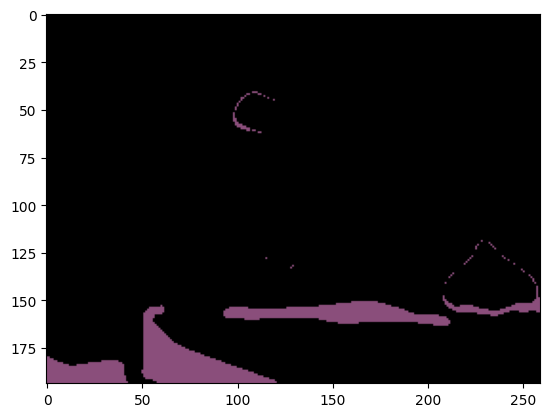

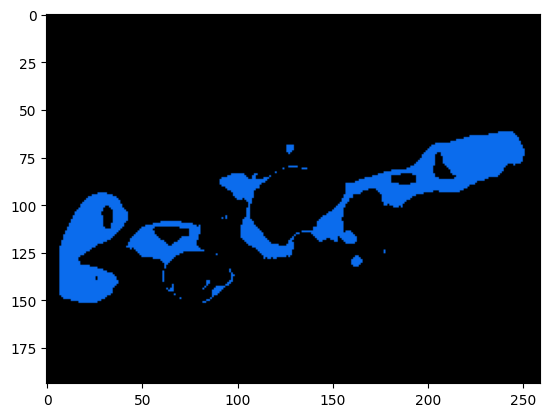

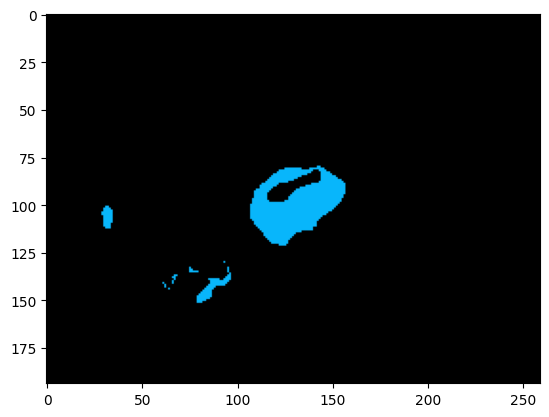

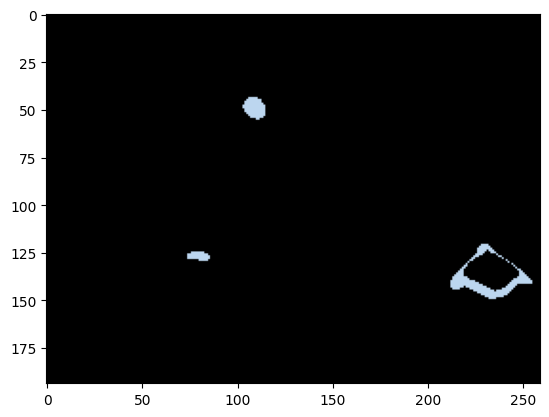

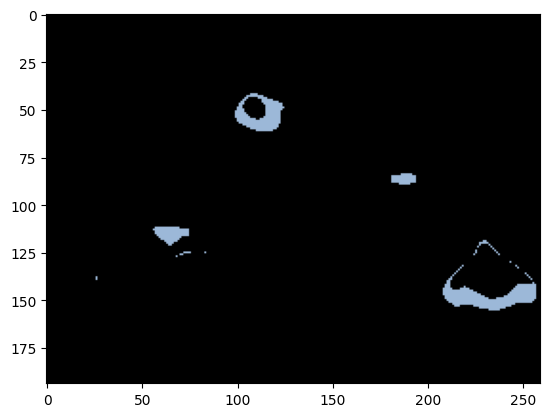

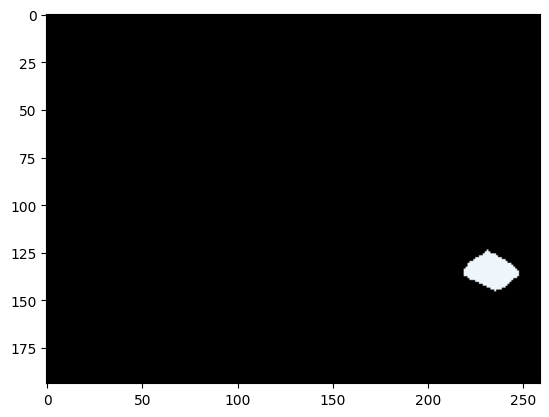

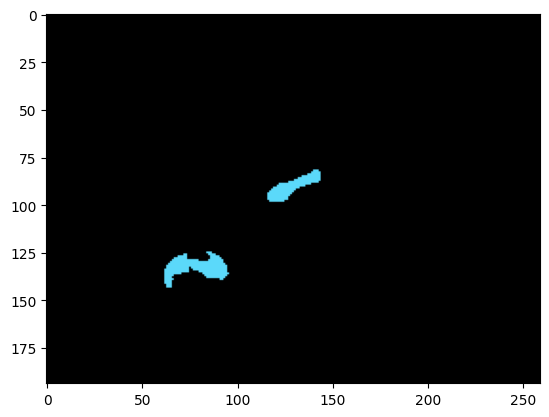

In [24]:
# describimos las unicas etiquetas
# labeled = ms.labels_ ------> ms tiene el mismo tamaño que X -----> labaled tambien tiene el mismo tamaño que X
labels = np.unique(labeled)

# # realizamos una iteracion sobre las etiquetas
for l in labels:

    # creamos un array (matriz) nulo de tamaño mxn = X.shape
    result = np.zeros(X.shape, dtype = np.uint8)  

    # tomamos los renglones de result de las etiquetas que son iguales a l y reasignamos los valores a cluster_int8[l, :] 
    result[labeled == l, :] = cluster_int8[l, :] 

    # remodelamos el tamaño del array para que tenga el mismo tamaño que img
    result = result.reshape(img.shape)

    # cvtColor () se utiliza para convertir una imagen de un espacio de color a otro.
    plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))

    # mostramos nuestra imagen en pantalla
    plt.show()

Therefore, we have classified our images according to their different vegetable types, using the $\color{lightblue}{\text{Mean Shift Clustering}}$.

$ \ $

-----

## ***Exercise***

$ \ $

$(1)$ Repeat the above image segmentation process for a new image on the internet.

In [25]:
# describimos la url de la imagen
url = 'https://www.plastform.ca/wp-content/themes/plastform/images/slider-image-2.jpg'

# esta funcion obtiene el contenido de la url
response = requests.get(url)

# Image.open abre e identifica el archivo de imagen dado
# BytesIO es una clase en el módulo 'Io' de Python que proporciona una interfaz similar a un archivo para flujos de bytes en memoria
img = Image.open(BytesIO(response.content))

# mostramos la imagen en pantalla
img

Output hidden; open in https://colab.research.google.com to view.

In [26]:
# convertimos nuestra imagen en un array
img = np.array(img) 

$ \ $

$(2)$ Now it's your turn to play around with the MeanShift algorithm.

In [27]:
# como se desprende claramente del nombre, esto toma una mediana de todos los píxeles debajo del área del núcleo y reemplaza el elemento central con este valor mediano.
img = cv.medianBlur(img, 7)

# remodelamos el tamaño de img para que tenga tamaño mx3
X = img.reshape((-1,3))

# describimos la data X en tipo float32
X = np.float32(X)

# Estimamos el ancho de banda (banda ancha) para utilizar luego en el algoritmo Mean Shift
bandwidth = estimate_bandwidth(X, quantile = 0.06, n_samples = 3000)

# usamos el algoritmo MeanShift
ms = MeanShift(bandwidth = bandwidth, bin_seeding = True)

# entrenamos el objeto creado anteriormente con el algoritmo MeanShift
ms.fit(X)

MeanShift(bandwidth=18.161704443833788, bin_seeding=True)

In [28]:
# describimos las etiquetas de ms
labeled = ms.labels_

# establecemos el tipo de datos de los centros de los clusters de ms, con tipo uint8
cluster_int8 = np.uint8(ms.cluster_centers_)

# creamos un array (matriz) de tamaño mxn = X.shape
result = np.zeros(X.shape, dtype = np.uint8)

# describimos las unicas etiquetas 
labels = np.unique(labeled)

# realizamos una iteracion sobre
for l in labels:

    # tomamos los renglones de result de las etiquetas que son iguales a l y reasignamos los valores a cluster_int8[l, :] 
    result[labeled == l, :] = cluster_int8[l, :]   

# remodelamos el tamaño de result para que tenga el mismo tamaño de img
result = result.reshape(img.shape)

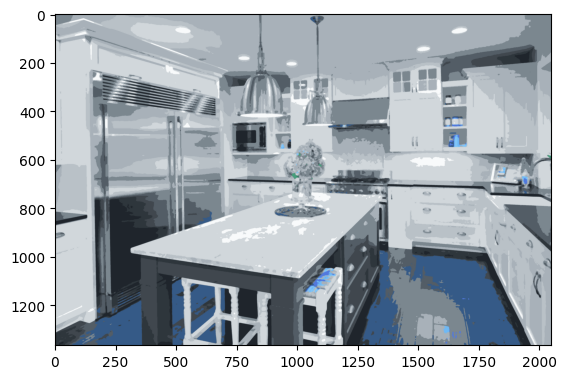

In [29]:
# cvtColor () se utiliza para convertir una imagen de un espacio de color a otro.
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))

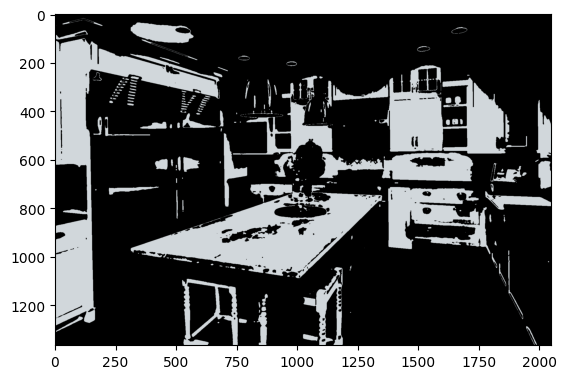

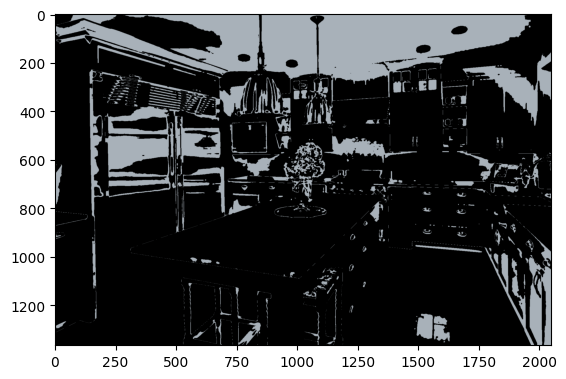

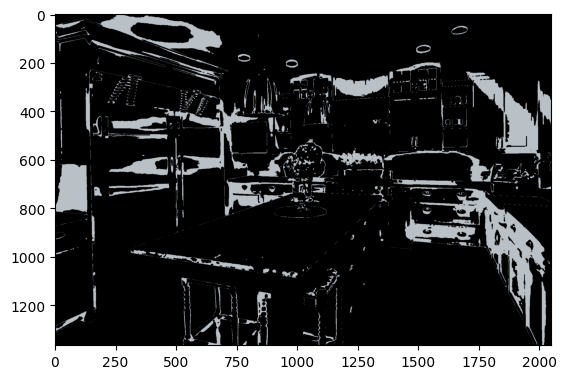

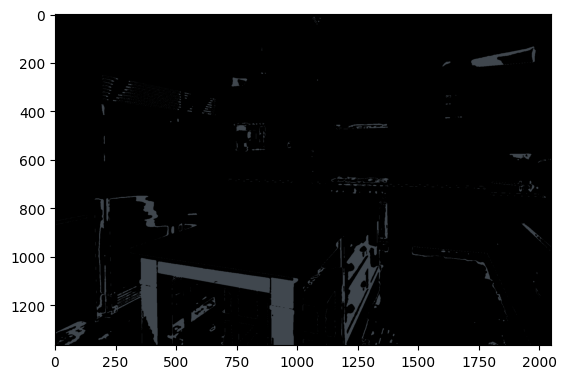

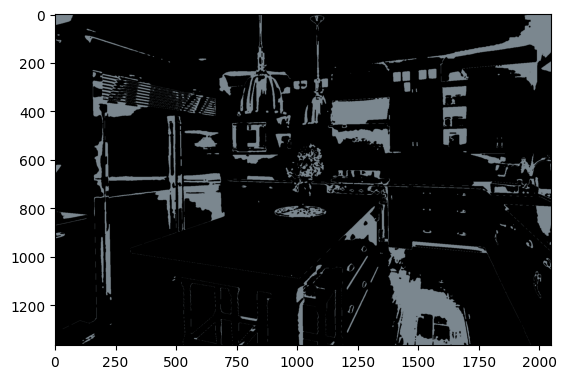

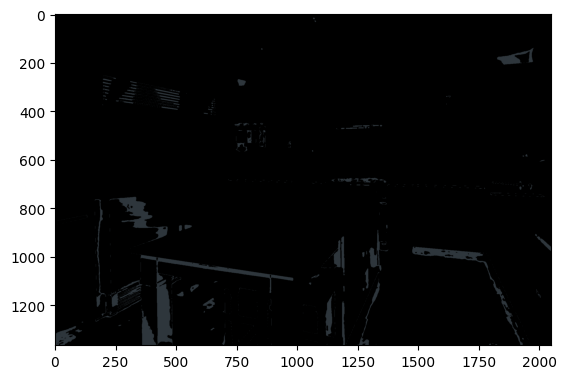

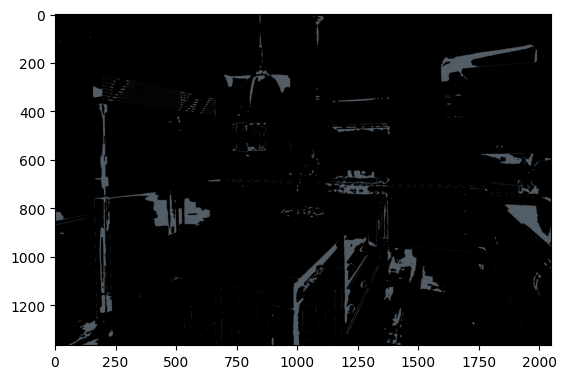

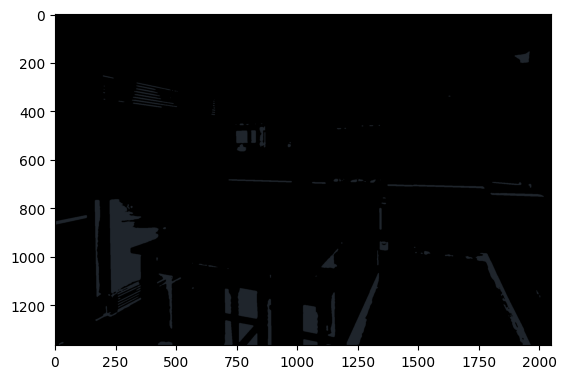

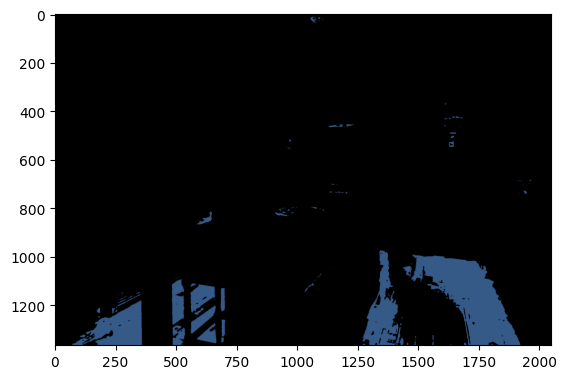

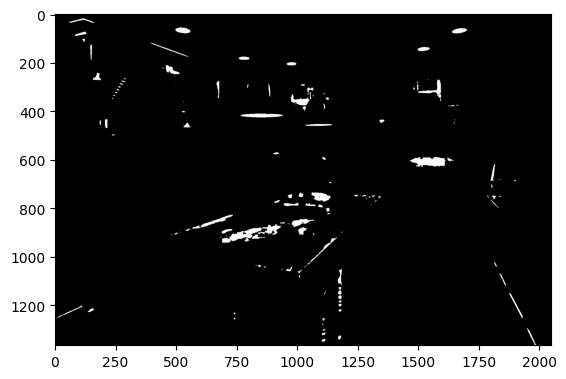

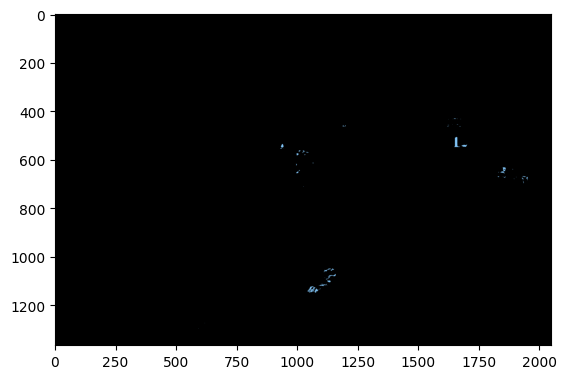

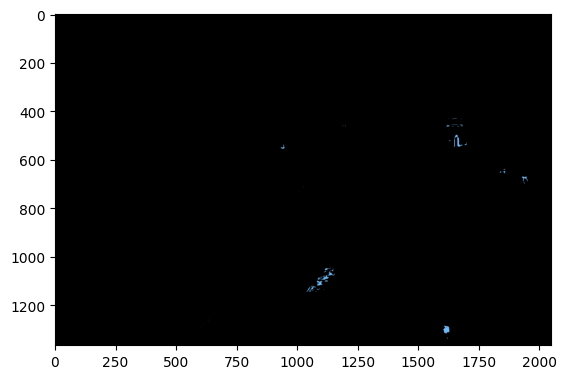

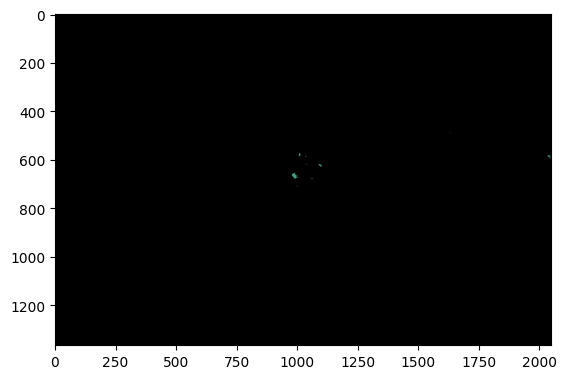

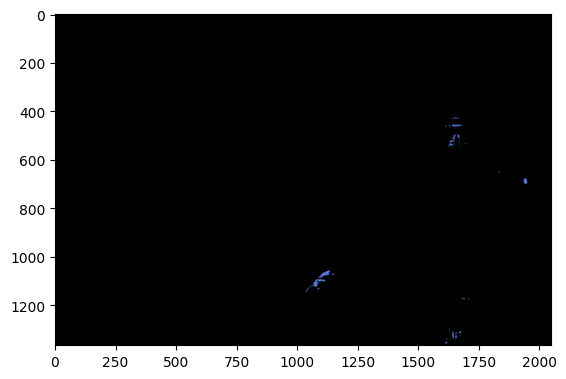

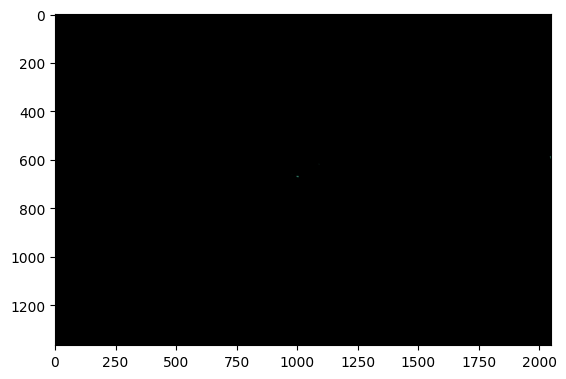

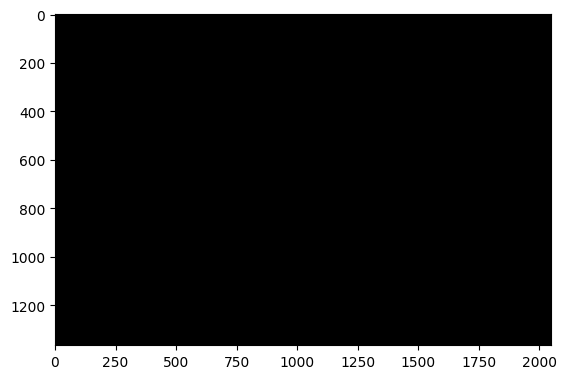

In [30]:
# describimos los unicos elementos de las etiquetas 
labels = np.unique(labeled)

# realizamos una iteracion sobre el conjunto de etiquetas 
for l in labels:

    # creamos un array (matriz) de tamaño mxn= X.sh
    result = np.zeros(X.shape, dtype = np.uint8)

    # tomamos los renglones de result de las etiquetas que son iguales a l y reasignamos los valores a cluster_int8[l, :] 
    result[labeled == l, :] = cluster_int8[l, :]  

    # remodelamos el tamaño de result para que tenga el mismo tamaño de img
    result = result.reshape(img.shape)

    # cvtColor () se utiliza para convertir una imagen de un espacio de color a otro.
    plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))

    # mostramos la imagen completa en pantalla
    plt.show()

$ \ $

-----

## ***Exercise***

$ \ $

On April 15, 1912, the Titanic collided with an iceberg and sank. When the Titanic sank, it killed 1502 out of 2224 passengers and crew. In this section you will apply $\color{lightblue}{\text{Mean Shift Clustering}}$ on features such as 

* age

* gender

*  class, etc.

We will then determine if there is a relationship between survival and the different clusters. 

$ \ $

$(1)$ Let's load the dataset.

In [31]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


$ \ $

$(2)$ We can drop the following columns <code>'Name','Ticket','Cabin','PassengerId','Embarked' </code> for simplicity.


In [32]:
df = df.drop(columns = ['Name','Ticket','Cabin','PassengerId','Embarked'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


$ \ $

$(3)$ We will assign "0" to "female" sex, and "1" to "male" sex, known as feature binarization. 


In [33]:
# describimos una mascara para el dataframe df que satisfaga que la columna 'sex' sea igual a female
mask_female = df['Sex'] == 'female'

# describimos una mascara para el dataframe df que satisfaga que la columna 'sex' sea igual a male
mask_male = df['Sex'] == 'male'

# actualizamos los valores de la columna 'Sex' que son iguales a 'female' toman ahora el valor de 0
df.loc[mask_female, 'Sex'] = 0

# actualizamos los valores de la columna 'Sex' que son iguales a 'male' toman ahora el valor de 1
df.loc[mask_male, 'Sex'] = 1

In [34]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


$ \ $

$(4)$ We will check for missing values.

In [35]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

$ \ $

$(5)$ Here, we replace the missing values in age, with the average age.

In [36]:
# describimos el promedio de los datos de la columna 'Age' del dataframe df
mean = df['Age'].mean()

# llenamos los espacios nan de la columna 'Age' del dataframe df ------> llenamos los valores precisamente con el valor mean
df['Age'].fillna(mean, inplace = True)

$ \ $

$(6)$ We will assign the dataframe to $X$, for clustering, and drop our target, the <code>Survival</code>  column. 


In [37]:
# tomamos el dataframe df y borramos la columna 'Survived' -----> el resultante dataframe lo llamamos X
X = df.drop(columns = ['Survived'])

$ \ $

$(7)$ Now, we will standardize the data $X$.

$ \ $

$$x \longrightarrow \dfrac{x-\mu}{\sigma}$$

In [38]:
X = df.apply(lambda x: (x-x.mean())/(x.std()+0.0000001), axis = 0)

In [39]:
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,-0.788829,0.826913,0.737281,-0.592148,0.432550,-0.473408,-0.502163
1,1.266278,-1.565228,-1.354812,0.638430,0.432550,-0.473408,0.786404
2,1.266278,0.826913,-1.354812,-0.284503,-0.474279,-0.473408,-0.488580
3,1.266278,-1.565228,-1.354812,0.407697,0.432550,-0.473408,0.420494
4,-0.788829,0.826913,0.737281,0.407697,-0.474279,-0.473408,-0.486064


$ \ $

$(8)$ To apply the $\color{lightblue}{\text{Mean Shift}}$  to $X$, first use the $\color{lightgreen}{\text{estimate_bandwidth}}$ function to estimate the value for the bandwidth parameter. Then create a $\color{lightblue}{\text{MeanShift object}}$ and fit it to $X$.


In [40]:
# Estimamos el ancho de banda (banda ancha) para utilizar luego en el algoritmo Mean Shift
bandwidth = estimate_bandwidth(X)

# usamos el algoritmo MeanShift
ms = MeanShift(bandwidth = bandwidth , bin_seeding = True)

# entrenamos nuestro modelo creado con el algoritmo Meanshift
ms.fit(X)

MeanShift(bandwidth=2.6395838673142666, bin_seeding=True)

$ \ $

$(9)$ Next, we append the clusters to the dataset for analysis.

In [41]:
# creamos una nueva columna sobre el dataframe X llamada 'cluster' que sera igual a las etiquetas de ms
X['cluster'] = ms.labels_

# creamos una nueva columna sobre el dataframe df llamada 'cluster' que sera igual a las etiquetas de ms
df['cluster'] = ms.labels_

$ \ $

$(10)$ Now, we group by clusters, to see that certain clusters have a larger chance of survival.

In [42]:
# tomamos el dataframe df y lo agrupamos teniendo en cuenta la columna 'cluster' pora obtener el promedio de cada componente
order = df.groupby('cluster').mean()

# ordenamos de manera descendente (9,8,7,..) el dataframe order por la columna 'Survived'
order.sort_values(by = ['Survived'], ascending = False)

,Survived,Pclass,Age,SibSp,Parch,Fare
cluster,,,,,,
5,1.000000,1.000000,35.333333,0.000000,0.333333,512.329200
4,0.750000,1.000000,27.822048,0.857143,1.250000,195.894643
0,0.381313,2.313131,30.734477,0.285354,0.199495,23.992865
3,0.307692,2.846154,38.692308,0.769231,4.230769,29.377562
1,0.260870,2.913043,8.745575,3.239130,1.543478,30.968026
2,0.000000,3.000000,29.699118,8.000000,2.000000,69.550000
6,0.000000,1.000000,61.000000,0.500000,3.000000,188.137500


From the table above, we see that:

* There are $7$ clusters generated by the $\color{lightblue}{\text{mean-shift analysis}}$.

* Each cluster contains the average percentage of survivors. For instance, cluster $\color{lightgreen}{\text{5}}$, has $100 \%$ of survivors, with the average age of $35.3$, passengers belonging to the $1^{st}$ class, and the passengers who paid the highest fare, $512.33$ per ticket. 

* Interestingly, Cluster $\color{lightgreen}{\text{6}}$, has $0 \%$ of survivors, with the average age of $61$, also belonging to the $1^{st}$ class and in the mid-range ticket fare. 

* It is not surprising that the highest odds for survival were held by the younger and richer groups of passengers.

$ \ $

-----

# ***How Mean Shift Works***

$ \ $

$\color{lightblue}{\text{Mean Shift algorithm}}$ has the following steps: 


* We start by placing a circle centered on each instance.

* For each circle it computes the mean of all the instances located within it.


* It shifts the circle, so that it is centered on the mean. 


* It iterates this $\color{lightblue}{\text{mean-shifting step}}$ until all the circles stop moving (i.e., until each of them is centered on the mean of the instances it contains). 


* $\color{lightblue}{\text{Mean Shift}}$ shifts the circles in the direction of higher density, until each of them has found a local density maximum. 

* Finally, all the instances whose circles have settled in the same place (or close enough) are assigned to the same cluster.

In the following section, we will review $\color{lightgreen}{\text{Kernel Density Estimation}}$, then we will derive the $\color{lightblue}{\text{Mean Shift vector}}$, and show how it finds the maximum values of the distribution. 

$ \ $

----

## ***Kernel Density Estimation***

$ \ $

Let's say we have a set $\{\boldsymbol{x}_{1},..,\boldsymbol{x}_{n}\}$ of $D$ -  dimensional samples, it can be difficult to calculate the histogram for density estimation, but we can represent the density using $\color{lightblue}{\text{Kernel Density Estimation (KDE)}}$. The Kernel is a Function of $x$ and the sample $x_{i}$ and there are many types of kernels, we chose the $\color{lightgreen}{\text{Gaussian kernel}}$ for simplicity. In this case, the  $\color{lightgreen}{\text{Gaussian kernel}}$ of the  $i^{th}$ sample is given by:

$$K_{h}(x - x_{i})=\dfrac {1}{{\sqrt {2\pi}\sigma}} e^{-{\frac {(x-x_{i})^{2}}{2\sigma^{2}}}} \Longleftarrow  K_{h}(x)=\dfrac {1}{{\sqrt {2\pi}\sigma}} e^{-{\frac {x^{2}}{2\sigma^{2}}}}$$

where $\sigma$ is a bandwidth parameter  and it is a constant, we can code the kernel in Python as a function of   $d = |\boldsymbol{x}-\boldsymbol{x}_{i}|$ and $\sigma = h$ as follow:

In [43]:
def gaussian(d, h):
  A = 1 / (math.sqrt(2*math.pi)*h)
  B = np.exp(-0.5*((d/h)**2))
  return A*B

$ \ $ 

$(1)$ We can calculate the Gaussian Kernel function for:

* $x_1 = 1$, $x \in [-2,4]$ and  $h=1$.

* $x_1 = 1$, $x \in [-2,4]$ and  $h=3$.


In [44]:
# describimos el valor de x_1
x_1 = 1

# describimos una particion de [-2,4] con 200 puntos
x = np.linspace(-2, 4, num = 200)

# describimos las distancias entre los puntos de la particion x y x_1
d = np.sqrt(((x-x_1)**2))

# usamos la funcion Gaussian Kernel con los parametros dados
kernel_1 = gaussian(d, 1)

# usamos la funcion Gaussian Kernel con los parametros dados
kernel_2 = gaussian(d, 3)

$ \ $

$(2)$ We can plot the kernel functions for the different values of $h$ , and overlay the histogram, which is zero everywhere, except where the data point exists.


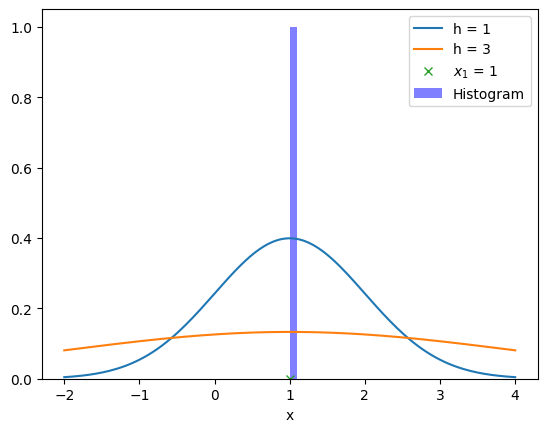

In [45]:
# Este plot esta descrito con color azul
# realizamos un plot (x,y) = (x, kernel_1)
plt.plot(x, kernel_1, label = 'h = 1')

# Este plot esta descrito con color naranja
# realizamos un plot (x,y) = (x, kernel_2)
plt.plot(x, kernel_2, label = 'h = 3')

# Este punto esta descrito con color verde
# realizamos un plot (x,y) = (1, 0)
plt.plot(x_1, 0, 'x', label = "$x_{1}$ = 1")

# realizamos un histograma con el punto (1,0) ------> esto describe una recta desde (1,0) hasta (1,10)
plt.hist(x_1, 10, facecolor = 'blue', alpha = 0.5, label = "Histogram")

# describimos la etiqueta del eje x
plt.xlabel('x')

# describimos la leyenda de la imagen
plt.legend()

# mostramos la imagen en pantalla
plt.show()

$ \ $

-----

## ***Note (Kernel Density Estimation)***

$ \ $

For many samples the $KDE$ function  is given by:

$${\hat {f}}_{h}(x)={\frac {1}{n}}\sum \limits_{i=1}^{n}K_{h}(x-x_{i}) = {\frac {1}{nh}}\sum \limits_{i=1}^{n}K\left(\dfrac{x-x_{i}}{h}\right)$$


$(1)$ In Python, we generate the $\color{lightblue}{\text{Kernel Density Estimation}}$ ($KDE$) with bandwith $h$ for set of point $x_{i}$, stored in the NumPy array $S$, in the range of $x$ as follows:

In [46]:
def kernel_density(S, x, h = 1):

    # describimos la longitud de S
    n = len(S)

    # describimos un array (renglon) con len(x) - ceros -----> tiene el mismo tamaño que X
    density = np.zeros(len(x))

    # realizamos una iteracion sobre el conjunto S
    for x_i in S:
        
        # tomamos la distancia entre los puntos de x y x_1
        d = np.sqrt((x-x_i)**2)

        # d = distance, h = desviacion estandar ------> tiene el mismo tamaño que x
        kernel = gaussian(d, h)

        # realizamos la sumatoria de los datos
        density = density + kernel

    # dividimos por la cantidad de elementos en S
    density = density/(n*h)
    
    # la funcion devuelve a density
    return density

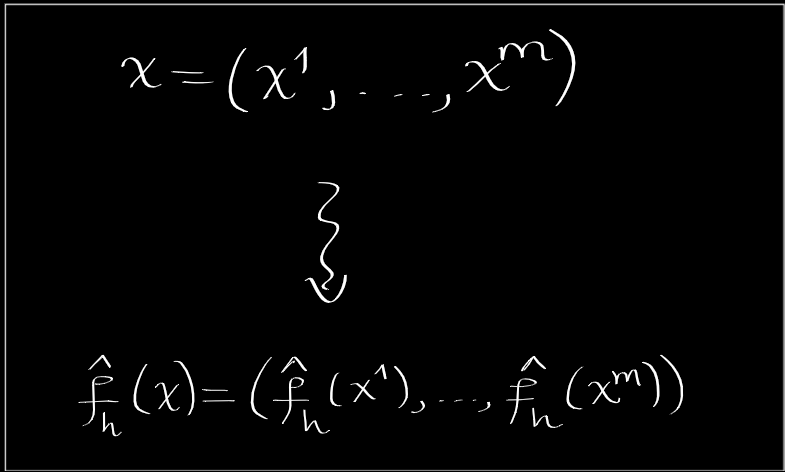

$ \ $

$(2)$ Consider the following data points, then we generate the density in a specified region $x$.

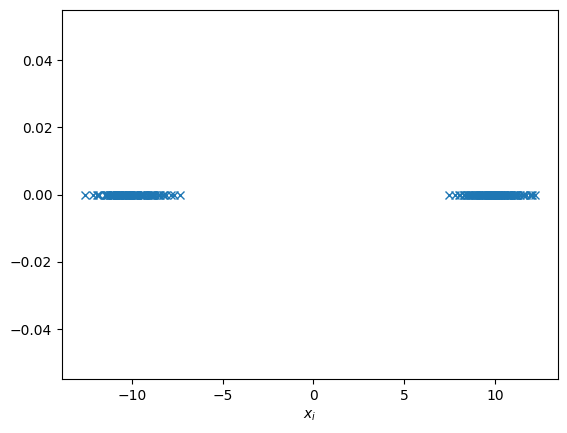

In [47]:
# creamos un array con 200 ceros 
S = np.zeros(200)

# actualizamos los primeros 100 valores de S
# mu = -10, sigma = 1,  muestras = 100
S[0 : 100] = np.random.normal(-10, 1, 100)

# actualizamos los ultimos 100 valores de S
# mu = 10, sigma = 1,  muestras = 100
S[100 : 200] = np.random.normal(10, 1, 100)

# realizamos un plot de 200 puntos que tienen la forma (x,0) con x en S
# x = S
# y = np.zeros(200)
plt.plot(S, np.zeros(200), 'x')

# describimos la etiqueta del eje x
plt.xlabel("$x_{i}$")

# mostramos el plot en pantalla
plt.show()

In [48]:
# describimos dos numeros a y b como se muestra a continuacion
a = S.min()-3
b = S.max()+3

# tomamos una particion con 200 puntos del intervalo [a, b]
x = np.linspace(a, b, num = 200)

# describimos la funcion kernel_density creada con anterioridad
density = kernel_density(S, x)

$ \ $

$(3)$ We plot the results along with clusters locations. They should correspond to the two peaks of the distribution.

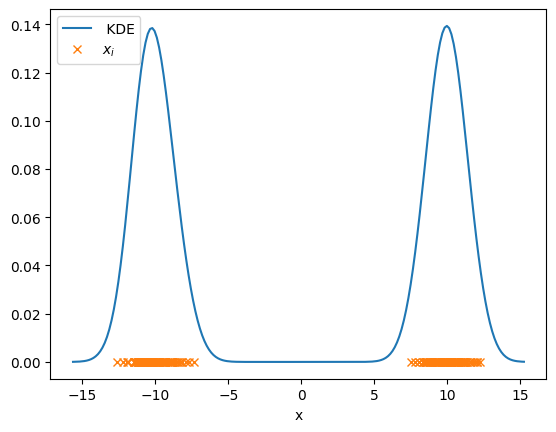

In [49]:
# describimos un plot (x,y) con: 
# x = x
# y = density
plt.plot(x, density, label = " KDE")

# describimos un plot (x,y) con: 
# x = S
# y = np.zeros(200)
plt.plot(S, np.zeros(200), 'x', label = "$x_{i}$")

# describimos la etiqueta del eje x
plt.xlabel('x')

# describimos la leyenda de la imagen
plt.legend()

# mostramos en pantalla la imagen creada
plt.show()